In [740]:
from abc import ABC, abstractmethod
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import beta
import copy
import numpy as np

In [741]:
class medicament():
    def __init__(self, indice_medicaments):
        self.indice_medicaments = indice_medicaments

    def medicamentFonctionne(self):
        if self.indice_medicaments == 0:
            return 0.3
        if self.indice_medicaments == 1:
            return 0.85
        if self.indice_medicaments == 2:
            return 0.1
        if self.indice_medicaments == 3:
            return 0.3
        if self.indice_medicaments == 4:
            return 0.5
        if self.indice_medicaments == 5:
            return 0.9
        if self.indice_medicaments == 6:
            return 0.4
        if self.indice_medicaments == 7:
            return 0.75
        if self.indice_medicaments == 8:
            return 0.1
        if self.indice_medicaments == 9:
            return 0.33
        else:
            return 0.0
        
    @staticmethod
    def donneListePiMedoc():
        liste_pi_medoc = []
        for i in range(10):
            medoc = medicament(i)
            liste_pi_medoc.append(medoc.medicamentFonctionne())
        return liste_pi_medoc

In [742]:
class patient() :
    
    def medicamentFonctionne(self,num_medicament):
        tempMedoc = medicament(num_medicament)
        tempTaux = random.random()
        tauxReel = tempMedoc.medicamentFonctionne()
        if tempTaux > tauxReel:
            return True
        else: return False
        
    def medicamentFonctionne1(self,num_medicament):
        tempMedoc = medicament(num_medicament)
        tempTaux = random.random()
        tauxReel = tempMedoc.medicamentFonctionne()
        if tempTaux > tauxReel:
            return 1
        else: return 0

In [743]:
class soignant():


    def findBestMedicIn30jours(self,listeMedoc) :
        
        success_rate = [0]*10
        failure_rate = [0]*10
        jour = 0
        nb_soigne = 0
        taux_soigne = []
         
        while jour < 100:
            if jour == 0 :
                for i in listeMedoc:
                    monPatient1 = patient()
                    monPatient2 = patient()
                    result1= monPatient1.medicamentFonctionne(i) 
                    result2= monPatient2.medicamentFonctionne(i) 
                    if result1:
                        success_rate[i] += 1
                        nb_soigne += 1
                    else :
                        failure_rate[i] += 1
                    taux_soigne.append(nb_soigne)
                    if result2:
                        success_rate[i] += 1
                        nb_soigne += 1
                    else :
                        failure_rate[i] += 1
                    taux_soigne.append(nb_soigne)
                jour += 20
                bestMedocs = sorted(range(len(success_rate)), key=lambda i: success_rate[i], reverse=True)[:int(round(len(listeMedoc)/2))]
                print("first try",bestMedocs)
            
            if jour == 20 :
                for i in bestMedocs:
                    monPatient1 = patient()
                    monPatient2 = patient()
                    result1= monPatient1.medicamentFonctionne(i) 
                    result2= monPatient2.medicamentFonctionne(i) 
                    if result1:
                        success_rate[i] += 1
                        nb_soigne += 1
                    else :
                        failure_rate[i] += 1
                    taux_soigne.append(nb_soigne)
                    if result2:
                        success_rate[i] += 1
                        nb_soigne += 1
                    else :
                        failure_rate[i] += 1
                    taux_soigne.append(nb_soigne)
                jour += len(bestMedocs)*2
                bestMedocs = sorted(range(len(success_rate)), key=lambda i: success_rate[i], reverse=True)[:int(round(len(bestMedocs)/2)+1)]
                print("second",jour, bestMedocs)
                print("après les 30 premiers jours", taux_soigne)

            if jour != 0 and jour != 20 :
                notreMedoc = bestMedocs[0]
                monPatient1 = patient()
                result1= monPatient1.medicamentFonctionne(notreMedoc) 
                if result1:
                    success_rate[i] += 1
                    nb_soigne += 1
                else :
                    failure_rate[i] += 1
                jour += 1
                taux_soigne.append(nb_soigne)

                print("Finalement",jour, result1)

        return taux_soigne
    
    def findBestMedicWithBeta(self,listeMedoc):
        success_rate = [0]*10
        failure_rate = [0]*10
        jour = 0
        nb_soigne = 0
        taux_soigne = []
        results = [[0,0]*10]
        while jour < 100 :
            valeur = []
            
            for i in range(0,len(results)) :
                a = 1+results[i][0]
                β = 1+results[i][1]-results[i][0]
                valeur.append(np.random.beta(a, β))
        
            bestMedoc:int =valeur.index(max(valeur))
            
            monPatient1 = patient()
            rep = monPatient1.medicamentFonctionne1(bestMedoc)
  
            results[bestMedoc][0]+=rep
            results[bestMedoc][1]+=1
            
            i = bestMedoc
            if rep==1:
                success_rate[i] += 1
                nb_soigne += 1
            else :
                failure_rate[i] += 1
            taux_soigne.append(nb_soigne)
            jour+=1
        return taux_soigne
    
    def tracer_courbes(self, taux_soigne, title):
        jours = range(100)  # Nombre de jours
        plt.plot(jours, taux_soigne)
        plt.xlabel("Jours passés")
        plt.ylabel("Nombre de patients soignés")
        plt.title(title)
        plt.show()
    import numpy as np
import matplotlib.pyplot as plt
'''
code pour généré la courbe selon la loi beta des valeurs pour chaque médicament
class Medicament:
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta
    
    def generateBetaValues(self):
        x = np.linspace(0, 1, 100)
        y = np.random.beta(self.alpha, self.beta, 100)
        return x, y
    
    # Définition des intervalles alpha et beta pour chaque médicament
    listeMedoc = [
        Medicament(1, 3),
        Medicament(2, 5),
        Medicament(3, 2),
        Medicament(4, 4),
        Medicament(2, 2)
    ]

    # Tracé des courbes pour chaque médicament
    plt.figure(figsize=(10, 6))
    for medoc in listeMedoc:
        x, y = medoc.generateBetaValues()
        plt.plot(x, y, label=f'Médicament {medoc.alpha}-{medoc.beta}')

    plt.xlabel('Valeur')
    plt.ylabel('Densité de probabilité')
    plt.title('Distribution des valeurs générées par la loi Beta pour chaque médicament')
    plt.legend()
    plt.show()
    '''


"\ncode pour généré la courbe selon la loi beta des valeurs pour chaque médicament\nclass Medicament:\n    def __init__(self, alpha, beta):\n        self.alpha = alpha\n        self.beta = beta\n    \n    def generateBetaValues(self):\n        x = np.linspace(0, 1, 100)\n        y = np.random.beta(self.alpha, self.beta, 100)\n        return x, y\n    \n    # Définition des intervalles alpha et beta pour chaque médicament\n    listeMedoc = [\n        Medicament(1, 3),\n        Medicament(2, 5),\n        Medicament(3, 2),\n        Medicament(4, 4),\n        Medicament(2, 2)\n    ]\n\n    # Tracé des courbes pour chaque médicament\n    plt.figure(figsize=(10, 6))\n    for medoc in listeMedoc:\n        x, y = medoc.generateBetaValues()\n        plt.plot(x, y, label=f'Médicament {medoc.alpha}-{medoc.beta}')\n\n    plt.xlabel('Valeur')\n    plt.ylabel('Densité de probabilité')\n    plt.title('Distribution des valeurs générées par la loi Beta pour chaque médicament')\n    plt.legend()\n    pl

first try [2, 8, 9, 0, 3]
second 30 [2, 8, 9]
après les 30 premiers jours [1, 1, 1, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 6, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 18, 19, 19]
Finalement 31 True
Finalement 32 True
Finalement 33 True
Finalement 34 True
Finalement 35 True
Finalement 36 True
Finalement 37 True
Finalement 38 True
Finalement 39 False
Finalement 40 True
Finalement 41 True
Finalement 42 True
Finalement 43 True
Finalement 44 True
Finalement 45 True
Finalement 46 True
Finalement 47 True
Finalement 48 False
Finalement 49 False
Finalement 50 True
Finalement 51 True
Finalement 52 True
Finalement 53 True
Finalement 54 True
Finalement 55 True
Finalement 56 False
Finalement 57 True
Finalement 58 True
Finalement 59 True
Finalement 60 True
Finalement 61 True
Finalement 62 True
Finalement 63 True
Finalement 64 True
Finalement 65 True
Finalement 66 True
Finalement 67 True
Finalement 68 True
Finalement 69 True
Finalement 70 True
Finalement 71 True
Finalement 72 True
Finalement 73 True
Fi

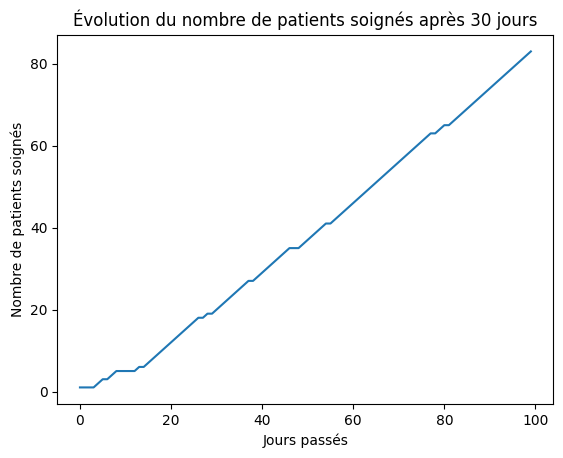

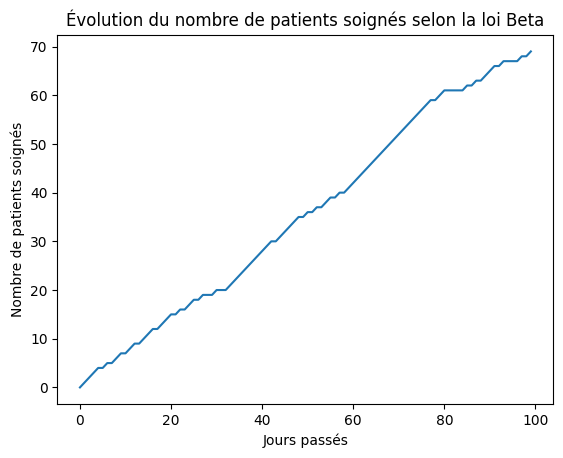

In [744]:
# Test
monSoignant = soignant()

listeMedoc = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
taux_soigne = monSoignant.findBestMedicIn30jours(listeMedoc)
monSoignant.tracer_courbes(taux_soigne, "Évolution du nombre de patients soignés après 30 jours")

# Utilisation de la fonction findBestMedicWithBeta()
listeMedoc = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
taux_soigne = monSoignant.findBestMedicWithBeta(listeMedoc)
monSoignant.tracer_courbes(taux_soigne, "Évolution du nombre de patients soignés selon la loi Beta")